Make table with defense and offensive points per team per season


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

compact_result_season = pd.read_csv('./data/DataFiles/RegularSeasonCompactResults.csv')

#import the file with team IDs
team_ids = pd.read_csv('./data/DataFiles/Teams.csv')

Merge Team IDs and Team Names

In [4]:
named_test = pd.merge(compact_result_season, team_ids[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID')

In [7]:
named_test.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'TeamID', u'WTeamName']

named_test = named_test.drop('TeamID', axis=1)

named_test = pd.merge(named_test, team_ids[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID')

named_test.columns = [   u'Season',    u'DayNum',   u'WTeamID',    u'WScore',   u'LTeamID',
          u'LScore',      u'WLoc',     u'NumOT', u'WTeamName',
          u'TeamID',  u'LTeamName']

In [9]:
named_test.drop('TeamID', axis=1, inplace=True)

In [11]:
named_test.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT WTeamName  \
0    1985      20     1228      81     1328      64    N      0  Illinois   
1    1985      33     1228      73     1328      70    H      0  Illinois   
2    1990      82     1112      78     1328      74    H      0   Arizona   
3    2011      34     1112      83     1328      60    H      0   Arizona   
4    1985     118     1242      82     1328      76    H      0    Kansas   

  LTeamName  
0  Oklahoma  
1  Oklahoma  
2  Oklahoma  
3  Oklahoma  
4  Oklahoma

In [19]:
named_test = named_test.sort_values(['WTeamID']).reset_index()

In [22]:
named_test.drop('index', axis=1, inplace=True)

In [23]:
named_test.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT    WTeamName  \
0    2015      49     1101      65     1354      59    N      0  Abilene Chr   
1    2016      25     1101      72     1197      62    N      0  Abilene Chr   
2    2014      94     1101      87     1223      81    H      0  Abilene Chr   
3    2015     120     1101      83     1223      71    H      0  Abilene Chr   
4    2016      92     1101      79     1223      72    H      0  Abilene Chr   

       LTeamName  
0  S Carolina St  
1    Florida A&M  
2    Houston Bap  
3    Houston Bap  
4    Houston Bap

In [43]:
maryland_wins = named_test[named_test['WTeamID'] ==1268]

In [45]:
maryland_wins_2016 = maryland_wins[maryland_wins['Season'] == 2016]

In [48]:
umd_2016_ppg = maryland_wins_2016['WScore'].mean()
umd_2016_ppga = maryland_wins_2016['LScore'].mean()

In [53]:
maryland_loss = named_test[named_test['LTeamID'] ==1268]
maryland_loss_2016 = maryland_loss[maryland_loss['Season'] == 2016]

In [60]:
umd_2016_ppg = (maryland_wins_2016['WScore'].mean()*len(maryland_wins_2016) + maryland_loss_2016['LScore'].mean()*len(maryland_loss_2016))/(len(maryland_loss_2016)+len(maryland_wins_2016))
umd_2016_ppga = (maryland_wins_2016['LScore'].mean()*len(maryland_wins_2016) + maryland_loss_2016['WScore'].mean()*len(maryland_loss_2016))/(len(maryland_loss_2016)+len(maryland_wins_2016))

In [123]:
#Process for creating table of interest
# 1 - Loop through WTeamIDS
# 2 - Loop through Seasons
# 3 -  Calculate PPG and PPGA
# 4 - Store in 'master - list'

master_list = []
header = ['TeamID', 'Team Name', 'Season', 'Number Wins', 'Number Losses', 'PPG', 'PPGA']
#master_list.append(header)

#find unique TeamIDS
unique_team_id = team_ids['TeamID'].unique()
unique_season = named_test['Season'].unique()
unique_season.sort()

#loop through TeamIDS
for ids in unique_team_id:
    win_team = named_test[named_test['WTeamID']==ids]
    loss_team = named_test[named_test['LTeamID']==ids]
    
    team_name = win_team['WTeamName'].iloc[0]
    
    for seas in unique_season:
        win_team_seas = win_team[win_team['Season']==seas]
        loss_team_seas = loss_team[loss_team['Season']==seas]
        
        len_win = len(win_team_seas)
        len_loss = len(loss_team_seas)
        
        if (len_win + len_loss) != 0:
        
            ppg_seas = (win_team_seas['WScore'].mean()*len_win + loss_team_seas['LScore'].mean()*len_loss)/(len_win+len_loss) 
            ppga_seas = (win_team_seas['LScore'].mean()*len_win + loss_team_seas['WScore'].mean()*len_loss)/(len_win+len_loss) 

        else:
            
            ppg_seas = 0.0
            ppga_seas = 0.0
                
        #storage tuple
        stor = [ids, team_name, seas, len_win, len_loss, ppg_seas, ppga_seas]
        master_list.append(stor)
    
    
        
        
        

        
    
                      

In [124]:
df1 = pd.DataFrame(master_list, columns = header)

In [141]:
duke = df1[df1['Team Name'] == 'Duke']

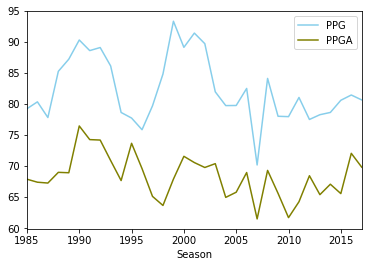

In [155]:
duke.plot(x ='Season', y = ['PPG', 'PPGA'], color = ['skyblue', 'olive'])

